In [1]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from moses_cross_val.main import moses_runner, model_evaluator, cross_val
from moses_cross_val.filters import loader
from utils import *
from dataset_utils import *
import matplotlib.pyplot as plt

In [3]:
# train_file, test_file = train_test_df_split("data/tamoxBinary_top100_genes.csv", "posOutcome")
train_file, test_file = "data/tamoxBinary_top100_genes_train.csv", "data/tamoxBinary_top100_genes_test.csv"

In [ ]:
cv_w_no_pen = cross_val.CrossValidation("tamoxBinary_top100_genes_train.csv", "data/cv_no_pen_comp6/",
                               "posOutcome", moses_options_comp_6, cross_val_opts, "precision", 0.75)

cv_w_no_pen.run_folds()

In [28]:
cv_w_no_pen.dataset = "/home/xabush/moses-incons-pen-xp/data/tamoxBinary_top100_genes.csv"
cv_w_no_pen.filter_value = 0.82
ensemble_df = cv_w_no_pen.majority_vote()

,model,recall,precision,accuracy,f1_score,p_value
0,or(and(or(and(or($DERL1 $CDKN1C) $NTRK2) and($...,0.873239,0.821192,0.766839,0.846416,5.612287e-15
1,ensemble,0.946921,0.835206,0.823988,0.887562,7.674086e-54


In [9]:
df_no_pen_comp6 = parse_combo_dir("data/cv_no_pen_comp6/", train_file, test_file)
df_no_pen_comp6.head()

,model,complexity,fold,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(or($BRF2 $INPP1) $BIRC5) and(!$D...,46,0,0.941489,0.869779,0.777314,0.904215,0.613139,0.778947,0.732673,0.492415,0.755102,0.205882
1,or(and(or(and(or($BRF2 $INPP1) $BIRC5) and(!$D...,46,0,0.933511,0.870968,0.776974,0.901155,0.620438,0.757895,0.734694,0.496594,0.746114,0.235294
2,or(and(or(and(or($BRF2 $INPP1) $BIRC5) and(!$D...,44,0,0.936170,0.869136,0.774654,0.901408,0.613139,0.747368,0.739583,0.506037,0.743455,0.264706
3,or(and(or(and(or(and($MRPL46 $PLA2G12A) $RFC4)...,47,0,0.938830,0.869458,0.775984,0.902813,0.613139,0.757895,0.734694,0.496594,0.746114,0.235294
4,or(and(or(and(or($AZIN1 $CTSO) $PDLIM1) and(or...,47,0,0.933511,0.870968,0.776974,0.901155,0.620438,0.757895,0.734694,0.496594,0.746114,0.235294


<AxesSubplot:ylabel='balanced_acc_test'>

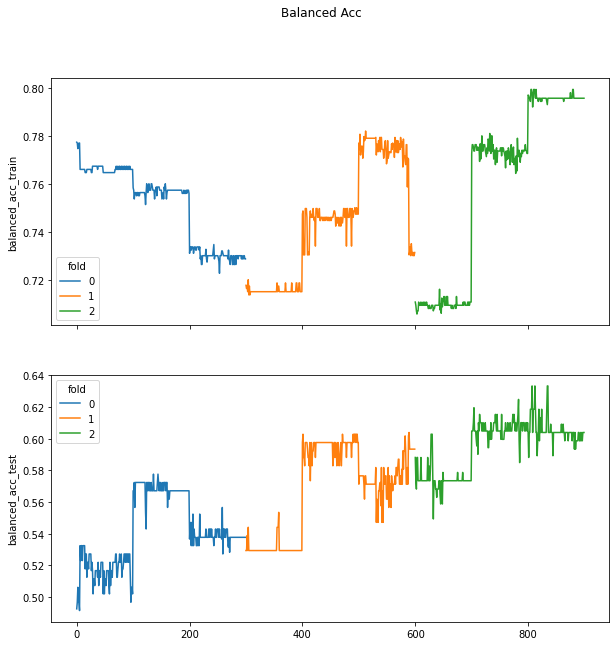

In [10]:

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Balanced Acc")

sns.lineplot(x=df_no_pen_comp6.index, y="balanced_acc_train", data=df_no_pen_comp6, hue="fold", ax=ax1)

sns.lineplot(x=df_no_pen_comp6.index, y="balanced_acc_test", data=df_no_pen_comp6, hue="fold", ax=ax2)

<AxesSubplot:ylabel='precision_test'>

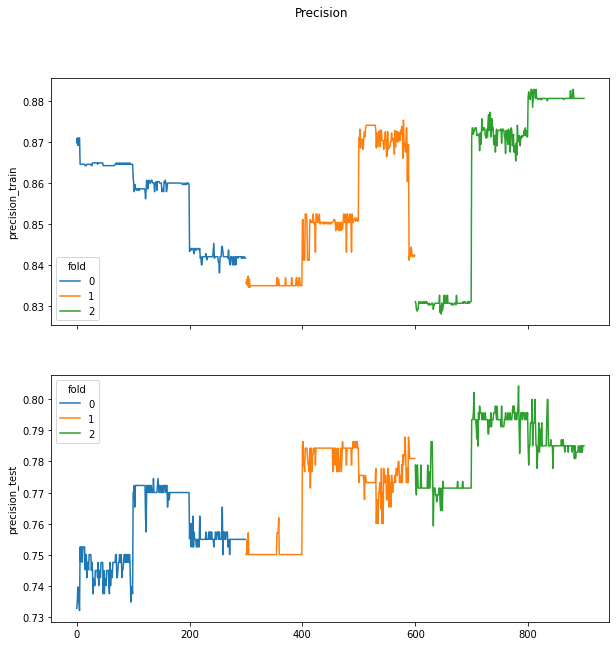

In [11]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")

sns.lineplot(x=df_no_pen_comp6.index, y="precision_train", data=df_no_pen_comp6, hue="fold", ax=ax1)

sns.lineplot(x=df_no_pen_comp6.index, y="precision_test", data=df_no_pen_comp6, hue="fold", ax=ax2)

<AxesSubplot:ylabel='complexity'>

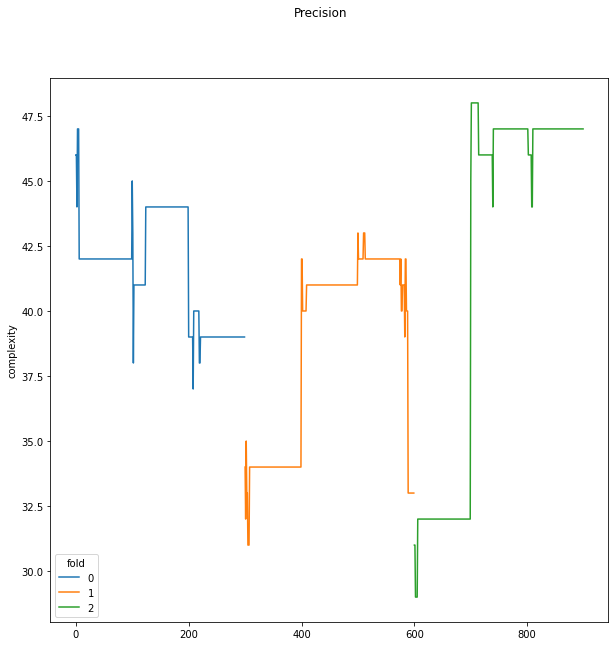

In [12]:

fig, ax1 = plt.subplots(1, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")

sns.lineplot(x=df_no_pen_comp6.index, y="complexity", data=df_no_pen_comp6, hue="fold", ax=ax1)